# 🎮 Video Game Sales Dataset — Exploratory Data Analysis (EDA)

## 🔍 0. Preliminary Steps

Before starting the analysis, let’s perform basic EDA steps to understand and clean the dataset.

### ✅ Instructions:
1. **Import required libraries:** 
   `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly` (optional, for interactive visualizations)

2. **Load the dataset:** 
   Read the CSV file (`vgsales.csv`) and display the first few rows.

3. **Check dataset information:** 
   Use `.info()` and `.describe()` to examine data types and basic statistics.

4. **Identify missing values:** 
   Use `.isnull().sum()` to check for missing values and visualize them if necessary.

5. **Check for duplicate rows:** 
   Remove duplicate records using `.drop_duplicates()`.

6. **Data type adjustments:** 
   Ensure numerical and categorical columns have the correct data types (e.g., `Year` should be an integer).

7. **Exploratory summary:** 
   Examine the number of unique values in categorical columns such as `Genre`, `Platform`, and `Publisher`.

8. **Outlier Analysis:** 
   Detect outliers using box plots and the IQR method.


## 📌 Exploratory Data Analysis: Project Setup

### Step 1 — Import Required Libraries

In this step, we import the core Python libraries required for data manipulation, numerical analysis, and data visualization.  
This stack represents a standard and widely accepted setup for exploratory data analysis (EDA).

In [6]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core libraries for data analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Step 2 — Load the Dataset

The dataset is loaded using pandas.
To follow best practices and preserve the original data, a copy of the dataset is created for all subsequent analysis and transformations.

In [9]:
# Load dataset
df = pd.read_csv("vgsales.csv")

# Create a working copy of the dataset
df_copy = df.copy()

# Verify that the copy is identical to the original
df_copy.equals(df)

True

### Step 3 — Initial Data Inspection

Before proceeding with data cleaning and analysis, we perform an initial inspection of the dataset.  
This step helps to understand the structure, data types, and overall completeness of the data.

Key objectives of this step:
- Preview the dataset content
- Verify column names and basic values
- Identify data types and potential missing values
- Confirm dataset size


#### Preview the Dataset

We start by examining the first few rows of the dataset to gain a high-level understanding of its structure and contents.

In [10]:
df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Dataset Structure and Data Types

Next, we inspect the dataset structure, including:
- Number of rows and columns
- Data types of each feature
- Presence of missing values

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### ✔️ Observations

- The dataset contains 16,598 records and 11 columns
- Categorical features include game name, platform, genre, and publisher
- Numerical features represent regional and global sales figures
- The dataset structure is suitable for further exploratory analysis
- This initial inspection confirms that the dataset is well-structured and ready for data cleaning and deeper exploration.

### Step 4 — Descriptive Statistics

Descriptive statistics provide a quantitative summary of the dataset and help identify general patterns, distributions, and potential anomalies in numerical features.

In this step, we analyze:
- Central tendency (mean, median)
- Dispersion (standard deviation, quartiles)
- Range and extreme values
- Distribution characteristics of sales across regions

#### Summary Statistics for Numerical Variables

The `describe()` method is used to generate descriptive statistics for all numerical columns in the dataset.

In [14]:
df_copy.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### ✔️ Key Insights
- Video game sales are highly right-skewed across all regions
- Median sales values are significantly lower than mean values, indicating that a small number of blockbuster titles dominate total sales
- Global sales show high variability, with extreme maximum values corresponding to exceptionally successful games
- Regional sales distributions follow similar skewed patterns, with most titles achieving relatively low sales figures
- The dataset spans releases from 1980 to 2020, with a strong concentration of games released after the year 2000

These characteristics suggest a long-tail distribution in video game sales, which should be taken into account during further analysis and visualization.

### Step 5 — Extended Descriptive Statistics (Numerical & Categorical)

To gain a complete overview of both numerical and categorical variables, we extend the descriptive analysis to include all columns in the dataset.

This step allows us to:
- Analyze categorical distributions
- Identify the most frequent values
- Assess data completeness across all features
- Detect potential high-cardinality columns

#### Full Descriptive Summary

The `describe(include="all")` method provides summary statistics for both numerical and categorical variables.

In [16]:
df_copy.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


#### ✔️ Key Insights

##### Categorical Variables
- The dataset contains high-cardinality categorical features, such as:
- Name (11,493 unique values)
- Publisher (578 unique values)
- The most frequent game title appears only 12 times, confirming a highly diverse game catalog
- The most common platform is Nintendo DS, reflecting its long lifecycle and high release volume
- Action is the most frequent genre, aligning with industry-wide trends

##### Numerical Variables
- Sales figures remain strongly right-skewed across all regions
- Median values are consistently lower than means, indicating dominance by a small number of top-selling titles
- The year variable confirms a concentration of releases in the mid-to-late 2000s

##### Data Completeness
- Minor missing values are observed in some categorical columns (e.g., Publisher)
- Overall, the dataset demonstrates high completeness and consistency, making it suitable for further analysis

This extended summary confirms the structural diversity of the dataset and provides a solid foundation for subsequent cleaning, transformation, and visualization steps.

### Step 6 — Missing Values Analysis

Handling missing values is a critical step in data preprocessing, as incomplete data can bias results and affect model performance.  
In this step, we assess the presence, distribution, and magnitude of missing values across the dataset.

#### Missing Values Count per Column

We begin by calculating the total number of missing values in each column.


In [18]:
df_copy.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### ✔️ Initial Findings
- The majority of columns contain no missing values
- Missing values are present only in:
- Year (271 missing entries)
- Publisher (58 missing entries)
- Sales-related columns are fully complete, ensuring reliability for quantitative analysis

#### Visualization Style Configuration

Before creating any visualizations, a unified visual style is defined to ensure consistency, readability, and a professional appearance across all plots.

In [91]:
sns.set_theme(style="white")

GAME_STYLE = {
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E6E8EF",
    "axes.labelcolor": "#111827",
    "text.color": "#111827",
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "grid.color": "#E6E8EF",
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    "axes.grid": False,          
    "axes.axisbelow": True,
    "font.family": "DejaVu Sans",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 140,
}

plt.rcParams.update(GAME_STYLE)

#### Visual Inspection of Missing Values

To better understand the distribution of missing values across rows and columns, a heatmap visualization is used.

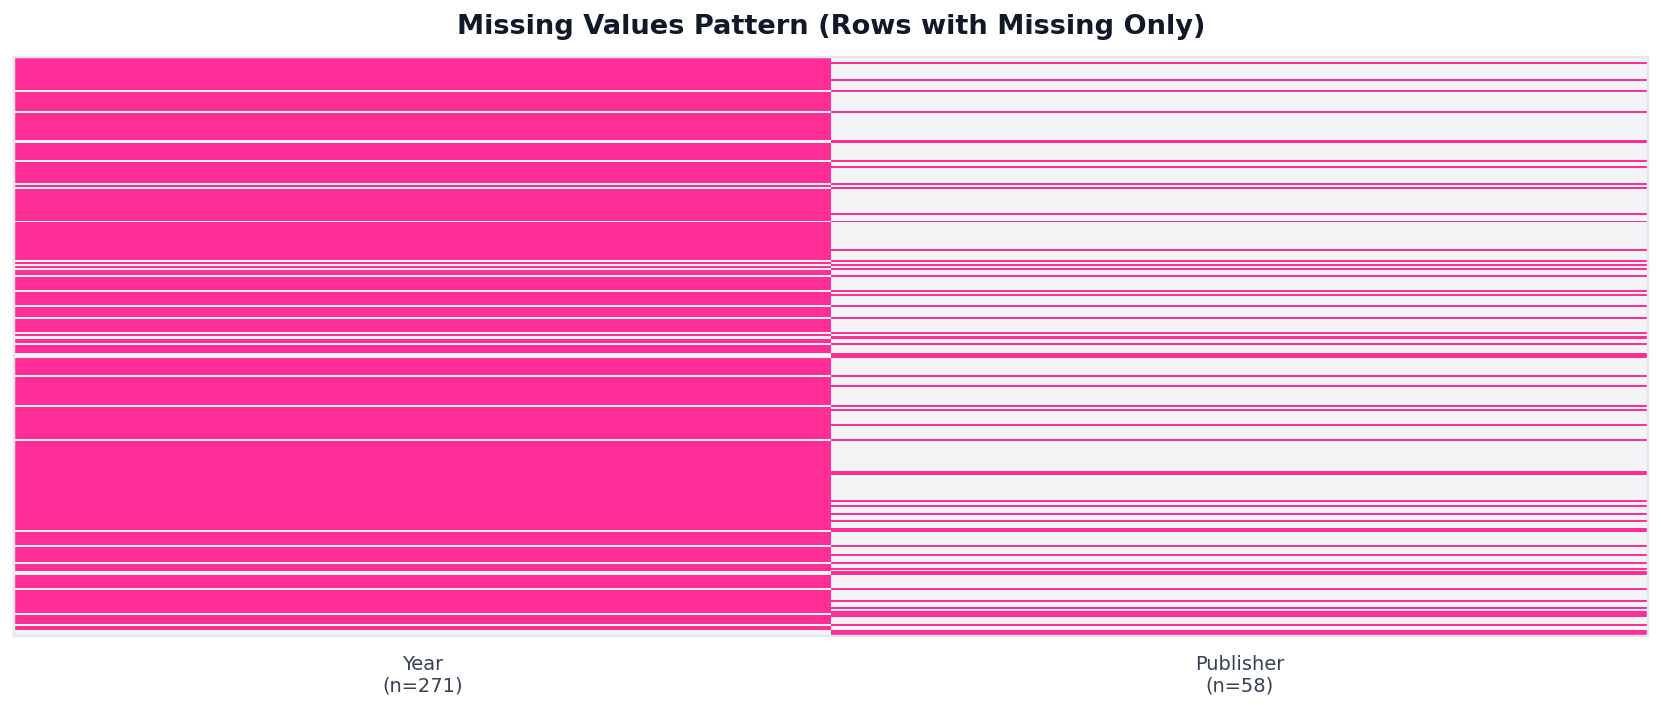

In [111]:
from matplotlib.colors import ListedColormap

missing = df_copy.isna()
cols_with_na = missing.columns[missing.any()]

if cols_with_na.empty:
    print("✅ No missing values in the dataset.")
else:
    # Sort columns by number of missing values (descending)
    na_count = missing[cols_with_na].sum().sort_values(ascending=False)
    cols_sorted = na_count.index.tolist()

    # Keep only rows that contain at least one missing value
    rows_with_any_na = missing[cols_sorted].any(axis=1)
    plot_data = missing.loc[rows_with_any_na, cols_sorted].astype(int)

    # Gaming-inspired palette
    cmap = ListedColormap(["#F3F4F6", "#FF2D95"])

    fig, ax = plt.subplots(figsize=(12, 5.2))

    sns.heatmap(
        plot_data,
        ax=ax,
        cmap=cmap,
        cbar=False,
        yticklabels=False,
        linewidths=0
    )

    labels = [f"{c}\n(n={na_count[c]:,})" for c in cols_sorted]
    ax.set_xticklabels(labels, rotation=0, ha="center")

    ax.set_title(
        "Missing Values Pattern (Rows with Missing Only)",
        pad=12
    )
    ax.set_xlabel("")
    ax.set_ylabel("")

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("#E6E8EF")

    plt.tight_layout()
    plt.show()

#### ✔️ Heatmap Interpretation
- Missing values are sparse and randomly distributed
- No visible patterns or clustering of missing data
- This suggests that missingness is likely not systematic

#### Visual Inspection of Missing Values
To clearly compare the magnitude of missing values between affected columns, a bar chart is generated.

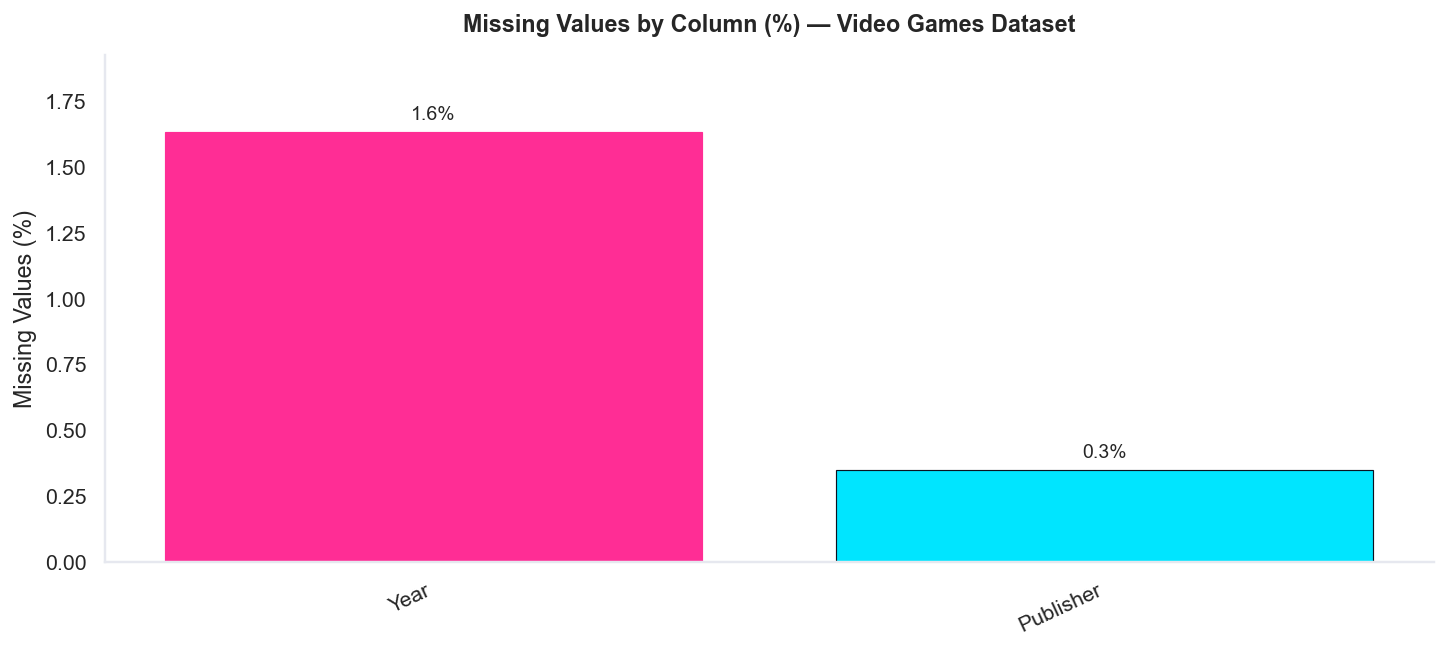

In [425]:
missing_pct = (
    df_copy.isna()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)
missing_pct = missing_pct[missing_pct > 0]

if missing_pct.empty:
    print("✅ No missing values in the dataset.")
else:
    # "Gaming" palette: neon cyan bars + magenta highlight for the worst column
    neon_cyan = "#00E5FF"
    neon_magenta = "#FF2D95"

    fig, ax = plt.subplots(figsize=(10.5, 4.8))

    x = np.arange(len(missing_pct))
    values = missing_pct.values

    bars = ax.bar(x, values, color=neon_cyan, edgecolor="#0B1220", linewidth=0.6)

    
    bars[0].set_color(neon_magenta)

    
    for i, (bar, v) in enumerate(zip(bars, values)):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            v + (values.max() * 0.02),
            f"{v:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10
        )

    ax.set_title("Missing Values by Column (%) — Video Games Dataset", pad=12)
    ax.set_ylabel("Missing Values (%)")
    ax.set_xlabel("")

    ax.set_xticks(x)
    ax.set_xticklabels(missing_pct.index, rotation=25, ha="right")

    ax.set_ylim(0, values.max() * 1.18)

    
    ax.grid(axis="x", visible=False)

    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#E6E8EF")
    ax.spines["bottom"].set_color("#E6E8EF")

    plt.tight_layout()
    plt.show()


#### ✔️ Summary & Implications
- Missing values account for a very small proportion of the dataset
- The absence of systematic missingness reduces the risk of bias
- The dataset remains highly suitable for further analysis
- Targeted handling strategies (e.g., removal or imputation) can be safely applied without significant information loss

This assessment confirms that missing values are limited and manageable, allowing the analysis to proceed with confidence.

### Step 7 — Duplicate Records Check

Duplicate records can distort aggregations, bias statistical results, and negatively affect downstream analysis.  
Therefore, the dataset is checked for fully duplicated rows.

In [23]:
df_copy.duplicated().sum()

0

#### ✔️ Findings
- No fully duplicated rows were detected
- Each record represents a unique game entry
- No duplicate removal is required at this stage

This confirms the structural integrity of the dataset and allows the analysis to proceed without additional deduplication steps.

### Step 8 — Data Type Adjustment: Year

The `Year` column contains missing values and is stored as a floating-point number.  
To ensure correct temporal analysis, it is converted to a numeric format, cleaned, and cast to an integer type.

In [26]:
df_copy.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [27]:
df_copy["Year"] = pd.to_numeric(df_copy["Year"], errors="coerce")

In [28]:
df_copy = df_copy.dropna(subset=["Year"])
df_copy["Year"] = df_copy["Year"].astype(int)

#### ✔️ Result
- Year is stored as an integer
- Missing values are removed
- The column is ready for time-based analysis

### Step 9 — Categorical Data Type Optimization

Categorical variables are converted to the `category` data type to improve memory efficiency and ensure correct representation during analysis and visualization.


In [136]:
# Convert selected columns to categorical type
categorical_cols = ["Platform", "Genre", "Publisher"]

for col in categorical_cols:
    df_copy[col] = df_copy[col].astype("category")

In [138]:
# Keep game names as object (high-cardinality text data)
df_copy["Name"] = df_copy["Name"].astype("object")

In [142]:
# Verify updated data types
df_copy.dtypes

Rank               int64
Name              object
Platform        category
Year             float64
Genre           category
Publisher       category
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object

#### ✔️ Result
- Platform, Genre, and Publisher are stored as categorical variables
- Name remains as an object due to high cardinality
- Improved memory usage and clearer semantic separation of features

### Step 10 — Categorical Variables Exploration

In this step, we explore the distribution and cardinality of key categorical variables to understand the structure and composition of the dataset.

#### Number of Unique Categories

We first examine how many unique values each categorical variable contains.

In [35]:
df_copy[["Genre", "Platform", "Publisher"]].nunique()

Genre         12
Platform      31
Publisher    576
dtype: int64

#### Unique Category Values

To better understand the category composition, we inspect the unique values for genres and platforms.

In [36]:
df_copy["Genre"].unique()

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', ..., 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
Length: 12
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation', 'Sports', 'Strategy']

In [37]:
df_copy["Platform"].unique()

['Wii', 'NES', 'GB', 'DS', 'X360', ..., 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Length: 31
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']

In [38]:
df_copy["Publisher"].unique()

['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Activision', ..., 'Inti Creates', 'Takuyo', 'Interchannel-Holon', 'Rain Games', 'UIG Entertainment']
Length: 577
Categories (576, object): ['10TACLE Studios', '1C Company', '20th Century Fox Video Games', '2D Boy', ..., 'imageepoch Inc.', 'inXile Entertainment', 'mixi, Inc', 'responDESIGN']

#### Category Frequency Distributions

Next, we analyze how frequently each category appears in the dataset.

In [152]:
# Genre distribution
df_copy["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [154]:
# Platform distribution
df_copy["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: count, dtype: int64

In [156]:
# Top publishers by number of games
df_copy["Publisher"].value_counts().head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

#### ✔️ Key Observations
- The dataset includes 12 game genres and 31 platforms, indicating manageable categorical diversity
- Action and Sports are the most common genres
- Platforms such as DS, PS2, and PS3 dominate in terms of release count
- The Publisher variable shows high cardinality, with a long-tail distribution dominated by a small number of major publishers
- This analysis provides important context for subsequent visualizations and aggregation-based analysis.

### Step 11 — Sales Distribution by Region

Analysis of sales distributions across different regions using box plots.


**Regional Sales Comparison**

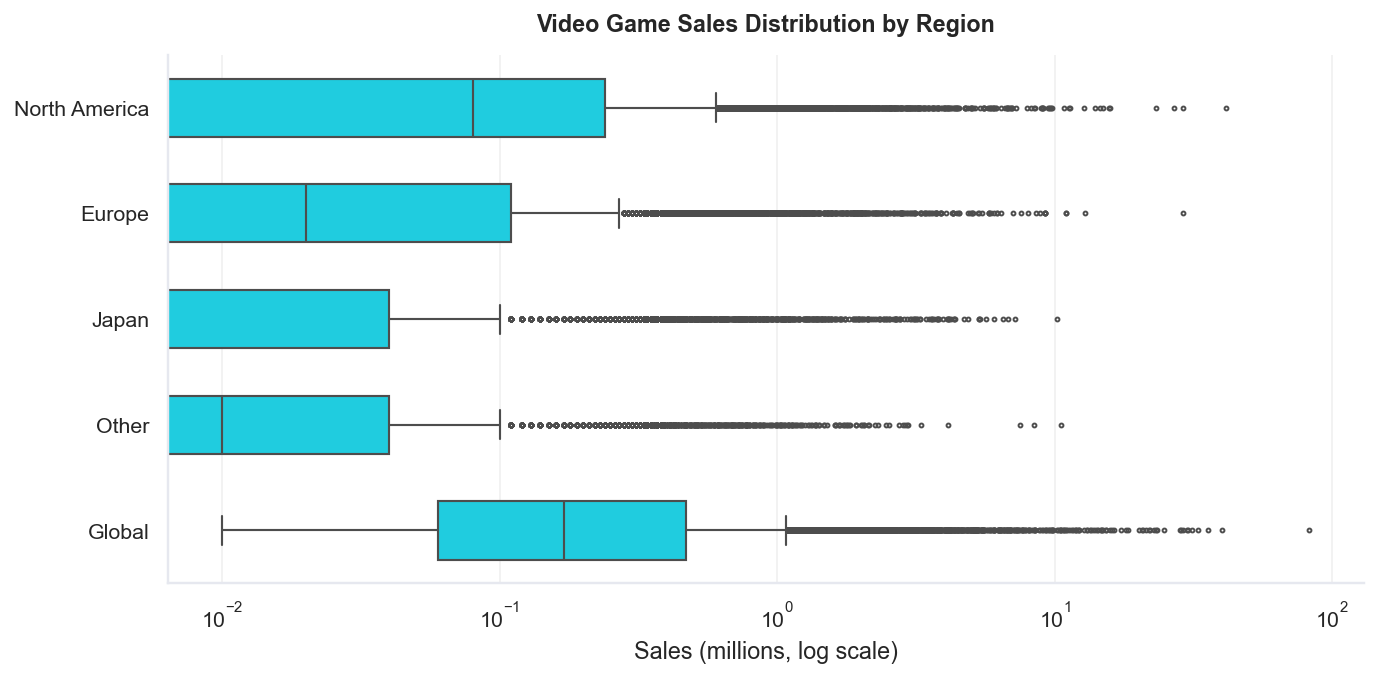

In [423]:
from matplotlib.ticker import FuncFormatter

sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

# 1) Prepare data (for seaborn)
plot_df = (
    df_copy[sales_cols]
    .melt(var_name="Region", value_name="Sales_Millions")
    .dropna()
)

# Optional: rename labels (cleaner)
region_map = {
    "NA_Sales": "North America",
    "EU_Sales": "Europe",
    "JP_Sales": "Japan",
    "Other_Sales": "Other",
    "Global_Sales": "Global"
}
plot_df["Region"] = plot_df["Region"].map(region_map)

# 2) Style
sns.set_theme(style="white")
neon_magenta = "#FF2D95"
neon_cyan = "#00E5FF"

fig, ax = plt.subplots(figsize=(10, 5), dpi=140)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# 3) Boxplot 
sns.boxplot(
    data=plot_df,
    y="Region",
    x="Sales_Millions",
    ax=ax,
    color=neon_cyan,
    width=0.55,
    fliersize=2,          
    linewidth=1.1
)

# 4) Log scale (key improvement for video game sales)
ax.set_xscale("log")

# 5) Labels & title
ax.set_title("Video Game Sales Distribution by Region", pad=12, fontweight="bold")
ax.set_xlabel("Sales (millions, log scale)")
ax.set_ylabel("")

# 6) Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

plt.tight_layout()
plt.show()

#### ✔️ Insights
- Sales distributions are highly right-skewed across all regions
- Most games achieve low sales, while a few titles generate extremely high sales
- Global sales show the widest spread and highest outliers
- Regional patterns are consistent with a long-tail sales distribution

### Step 12 — Outlier Detection (IQR Method)

Identification of extreme sales values using the Interquartile Range (IQR) method.

**IQR-Based Outlier Calculation**

In [47]:
Q1 = df_copy[sales_cols].quantile(0.25)
Q3 = df_copy[sales_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_copy[sales_cols] < (Q1 - 1.5 * IQR)) | (df_copy[sales_cols] > (Q3 + 1.5 * IQR))
outliers.sum()

NA_Sales        1660
EU_Sales        2054
JP_Sales        2407
Other_Sales     1645
Global_Sales    1827
dtype: int64

**Outlier Records**

In [48]:
df_outliers = df_copy[outliers.any(axis=1)]
df_outliers.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### ✔️ **Key Insights**
- Outliers are driven by a small number of exceptionally successful games (e.g., flagship Nintendo titles)
- Extreme values are consistently observed across both regional and global sales, indicating worldwide market impact
- The long-tail nature of the sales distribution reflects realistic industry dynamics
- Removing these outliers would distort overall market representation and underestimate top-performing titles

Outliers are therefore **retained** in the dataset, as they represent meaningful and informative observations essential for accurate market analysis.

## 1. 🎮 Which game genre has the most games produced?

Analysis of game release volume over time to identify peak production years.

**Games Released per Year**

In [191]:
genre_counts = df_copy["Genre"].value_counts()
genre_counts

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

#### Visualization: Number of Games Released by Year

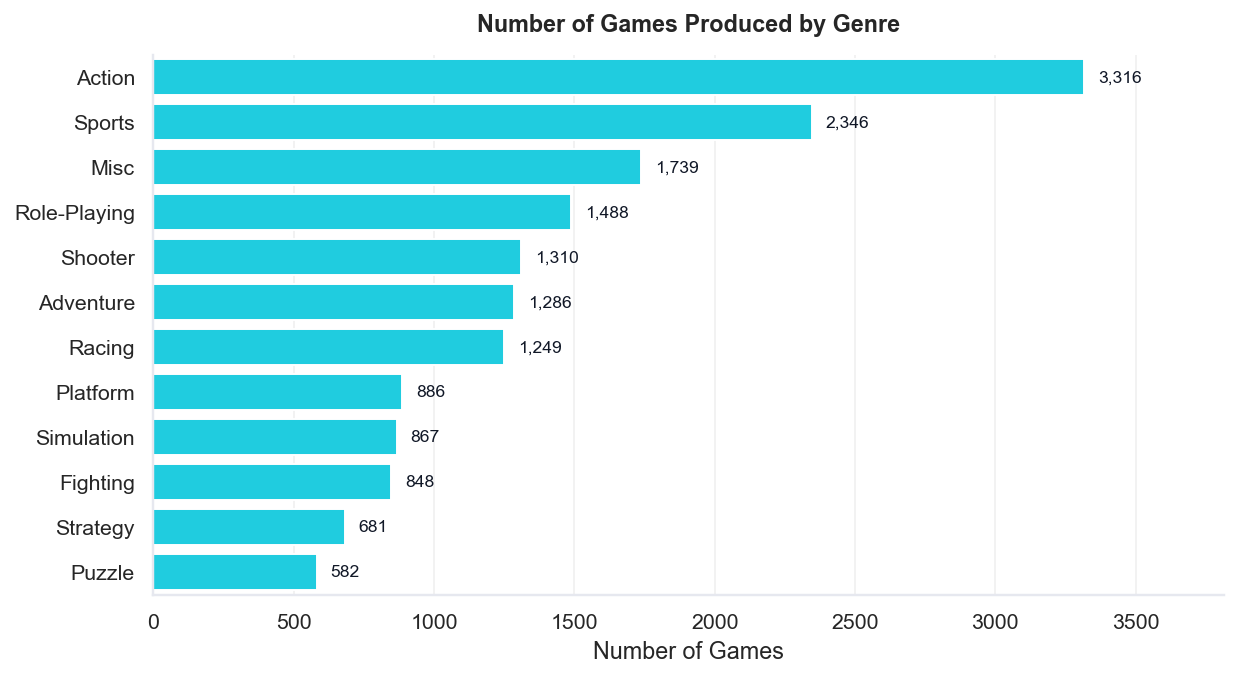

In [230]:
# Count number of games per genre
genre_counts = df_copy["Genre"].value_counts()

# Sort by number of games (descending)
genre_counts_sorted = genre_counts.sort_values(ascending=False)

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(9, 5), dpi=140)

bar_color = "#00E5FF"  # neon cyan

sns.barplot(
    x=genre_counts_sorted.values,
    y=genre_counts_sorted.index,
    order=genre_counts_sorted.index,  
    ax=ax,
    color=bar_color
)

# Add value labels 
max_val = genre_counts_sorted.max()
for i, v in enumerate(genre_counts_sorted.values):
    ax.text(
        v + max_val * 0.015,
        i,
        f"{v:,}",
        va="center",
        ha="left",
        fontsize=9,
        color="#111827"
    )

# Titles and labels
ax.set_title("Number of Games Produced by Genre", pad=12, fontweight="bold")
ax.set_xlabel("Number of Games")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

# Give space for labels
ax.set_xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

#### ✔️ **Insight**
- Game production steadily increased over time
- The highest number of releases occurred in the late 2000s (around 2008–2009)
- This period reflects peak industry expansion before a gradual decline

## 2. 📆 Which year had the highest number of game releases?

Analysis of total global video game sales aggregated by year to identify the peak revenue period.


**Global Sales per Year**

In [55]:
games_per_year = df_copy["Year"].value_counts().sort_index()
games_per_year

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
Name: count, dtype: int64

**Peak Global Sales Year**

In [56]:
games_per_year.idxmax(), games_per_year.max()

(2009, 1431)

**Visualization: Global Sales by Year**

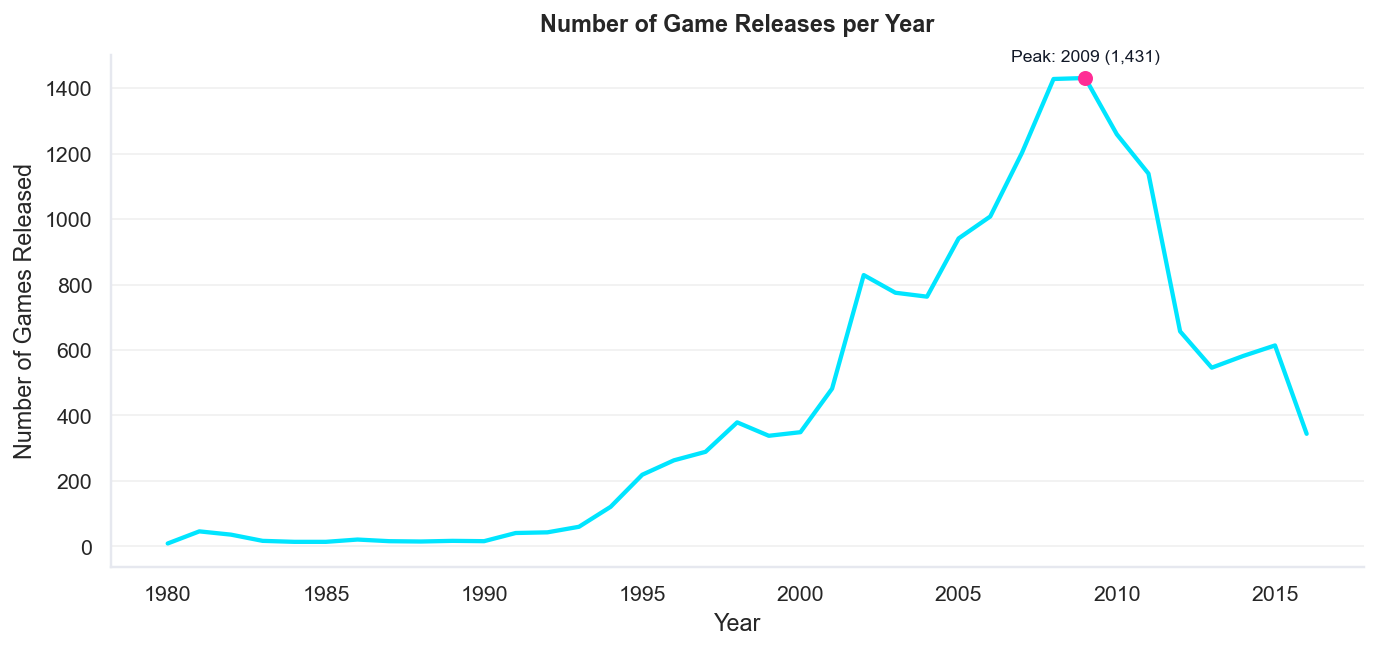

In [226]:
# Prepare data (clean years) 
year_series = pd.to_numeric(df_copy["Year"], errors="coerce").dropna()

# Keep realistic range for vgsales 
year_series = year_series[(year_series >= 1980) & (year_series <= 2016)]

games_per_year = year_series.value_counts().sort_index()

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(10, 4.8), dpi=140)

neon_cyan = "#00E5FF"
text_dark = "#111827"
grid_light = "#E6E8EF"

# Line 
ax.plot(
    games_per_year.index,
    games_per_year.values,
    linewidth=2.2,
    color=neon_cyan
)

# Optional: highlight the peak year 
peak_year = int(games_per_year.idxmax())
peak_value = int(games_per_year.max())
ax.scatter([peak_year], [peak_value], s=45, color="#FF2D95", zorder=3)
ax.text(
    peak_year,
    peak_value * 1.03,
    f"Peak: {peak_year} ({peak_value:,})",
    ha="center",
    va="bottom",
    fontsize=9,
    color=text_dark
)

# Titles & labels
ax.set_title("Number of Game Releases per Year", pad=12, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Games Released")

# Ticks: reduce clutter
ax.set_xticks(np.arange(int(games_per_year.index.min()), int(games_per_year.index.max()) + 1, 5))

# Grid & spines
ax.grid(axis="y", alpha=0.25)
ax.grid(axis="x", visible=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(grid_light)
ax.spines["bottom"].set_color(grid_light)

plt.tight_layout()
plt.show()

#### ✔️ **Insight** 
- Global video game sales peaked around 2008–2009
- This period aligns with the highest number of game releases
- Indicates a strong relationship between production volume and total market revenue

## 3. 🏷️ Top 5 years with the highest number of game releases by genre

Analysis of total global sales aggregated by **year and genre** to identify the strongest year–genre combination by revenue.

 **Global Sales by Year and Genre**

In [246]:
games_by_year_genre = (
    df_copy
    .groupby(["Year", "Genre"], observed=True)
    .size()
    .reset_index(name="Game_Count")
)

**Top Year–Genre by Global Sales**

In [248]:
top_5_years_genre = games_by_year_genre.sort_values(
    by="Game_Count", ascending=False
).head(5)

top_5_years_genre

,Year,Genre,Game_Count
291,2009.0,Action,272
327,2012.0,Action,266
363,2015.0,Action,255
315,2011.0,Action,239
303,2010.0,Action,226


**Visualization: Top Year–Genre Sales Combinations**

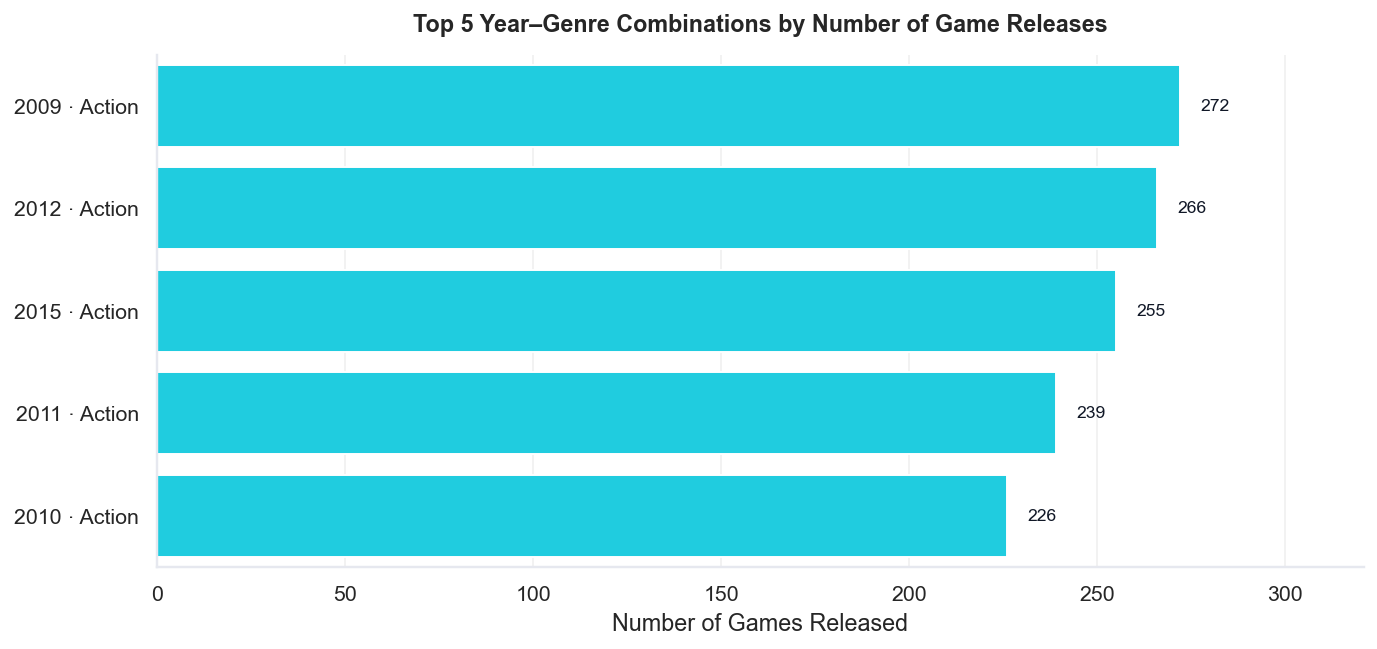

In [252]:
# Make a copy and create a readable label
plot_df = top_5_years_genre.copy()

plot_df["Year"] = plot_df["Year"].astype(int)
plot_df["Genre"] = plot_df["Genre"].astype(str)  # ✅ важно: category -> str

plot_df["Year_Genre"] = plot_df["Year"].astype(str) + " · " + plot_df["Genre"]

# Sort so the biggest is on top
plot_df = plot_df.sort_values("Game_Count", ascending=False)

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(10, 4.8), dpi=140)

neon_cyan = "#00E5FF"

sns.barplot(
    data=plot_df,
    x="Game_Count",
    y="Year_Genre",
    ax=ax,
    color=neon_cyan
)

# Value labels (small, outside)
max_val = plot_df["Game_Count"].max()
for i, v in enumerate(plot_df["Game_Count"].values):
    ax.text(
        v + max_val * 0.02,
        i,
        f"{int(v):,}",
        va="center",
        ha="left",
        fontsize=9,
        color="#111827"
    )

ax.set_title(
    "Top 5 Year–Genre Combinations by Number of Game Releases",
    pad=12,
    fontweight="bold"
)
ax.set_xlabel("Number of Games Released")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

# Give room for labels
ax.set_xlim(0, max_val * 1.18)

plt.tight_layout()
plt.show()

#### ✔️ **Insight** 
- Action genre dominates peak sales years
- Highest single-year genre sales occurred during the late 2000s
- Confirms Action games as both the most produced and most commercially successful genre

## 4. 💰 Which year had the highest global sales?

Analysis of total global sales aggregated by **game genre** to identify the most commercially successful genre.


**Global Sales by Genre**

In [268]:
sales_by_year = (
    df_copy
    .groupby("Year", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

sales_by_year.head()

Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
Name: Global_Sales, dtype: float64

**Top Genre by Global Sales**

In [270]:
sales_by_year.idxmax(), sales_by_year.max()

(2008.0, 678.9)

**Visualization: Global Sales by Genre**

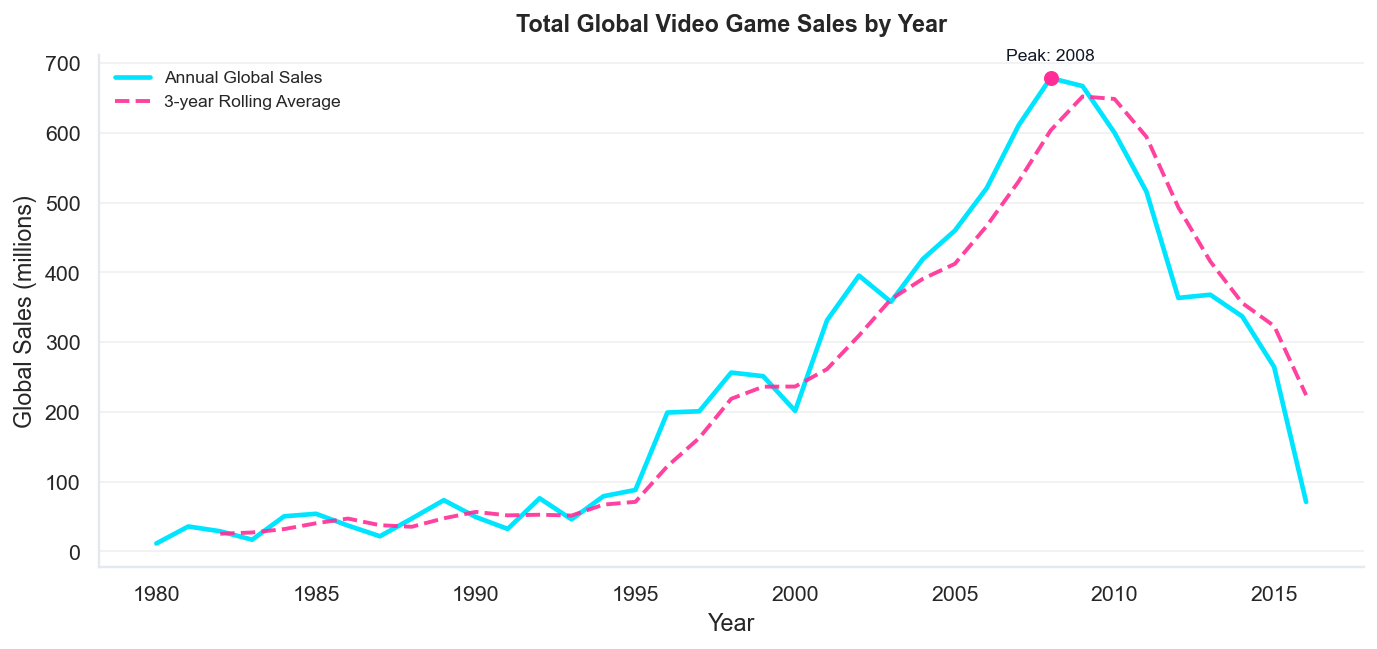

In [272]:
# Prepare data (clean + realistic year range)
sales_series = (
    sales_by_year
    .copy()
    .sort_index()
)

sales_series = sales_series[(sales_series.index >= 1980) & (sales_series.index <= 2016)]

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(10, 4.8), dpi=140)

neon_cyan = "#00E5FF"
neon_magenta = "#FF2D95"
grid_light = "#E6E8EF"
text_dark = "#111827"

# Main line
ax.plot(
    sales_series.index,
    sales_series.values,
    linewidth=2.4,
    color=neon_cyan,
    label="Annual Global Sales"
)

# Optional: rolling mean (3-year smoothing) 
rolling = sales_series.rolling(3).mean()
ax.plot(
    rolling.index,
    rolling.values,
    linewidth=2,
    linestyle="--",
    color=neon_magenta,
    alpha=0.9,
    label="3-year Rolling Average"
)

# Highlight peak year
peak_year = int(sales_series.idxmax())
peak_value = float(sales_series.max())
ax.scatter([peak_year], [peak_value], s=45, color=neon_magenta, zorder=3)
ax.text(
    peak_year,
    peak_value * 1.03,
    f"Peak: {peak_year}",
    ha="center",
    va="bottom",
    fontsize=9,
    color=text_dark
)

# Titles & labels
ax.set_title("Total Global Video Game Sales by Year", pad=12, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Global Sales (millions)")

# X ticks every 5 years (clean)
ax.set_xticks(np.arange(
    int(sales_series.index.min()),
    int(sales_series.index.max()) + 1,
    5
))

# Grid & spines
ax.grid(axis="y", alpha=0.25)
ax.grid(axis="x", visible=False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(grid_light)
ax.spines["bottom"].set_color(grid_light)

ax.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()

#### ✔️ **Insight**
- Action is the highest-grossing genre globally
- High sales align with both high production volume and broad market appeal
- Confirms Action as the dominant genre in terms of overall revenue

## 5. 🕹️ Which game genre was released the most in a single year?

Analysis of game release counts aggregated by **year and genre** to identify the highest single-year concentration.


**Game Releases by Year and Genre**

In [70]:
genre_year_counts = (
    df_copy
    .groupby(["Year", "Genre"], observed=True)
    .size()
    .reset_index(name="Game_Count")
)

top_genre_year = genre_year_counts.sort_values(
    by="Game_Count", ascending=False
).head(1)

top_genre_year

,Year,Genre,Game_Count
291,2009,Action,272


#### ✔️ **Insight**
- Action is the genre with the highest number of releases in a single year
- The peak occurred in 2009, with 272 Action games released
- Confirms Action as the most intensively produced genre during peak industry years

## 6. 💸 Which game genre had the highest sales in a single year?

Analysis of total **global sales aggregated by year and genre** to identify the strongest single-year performance.


**Global Sales by Year and Genre**

In [73]:
sales_by_year_genre = (
    df_copy
    .groupby(["Year", "Genre"], observed=True)["Global_Sales"]
    .sum()
    .reset_index()
)

In [74]:
top_sales_genre_year = sales_by_year_genre.sort_values(
    by="Global_Sales", ascending=False
).head(1)

top_sales_genre_year

,Year,Genre,Global_Sales
291,2009,Action,139.36


#### ✔️ **Insight**
- Action achieved the highest global sales in a single year 
- Peak performance occurred in 2009, with 139.36 million units sold 
- Confirms Action as the most commercially dominant genre during peak market years 

## 7. 🌍 Which game genre has the highest global sales revenue?

Analysis of **total global sales aggregated by genre** to identify the most commercially successful game category.


**Global Sales by Genre**

In [299]:
genre_sales = (
    df_copy
    .groupby("Genre", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

genre_sales

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

**Top Genre by Global Sales**

In [301]:
genre_sales.idxmax(), genre_sales.max()

('Action', 1751.18)

**Visualization: Total Global Sales by Genre**

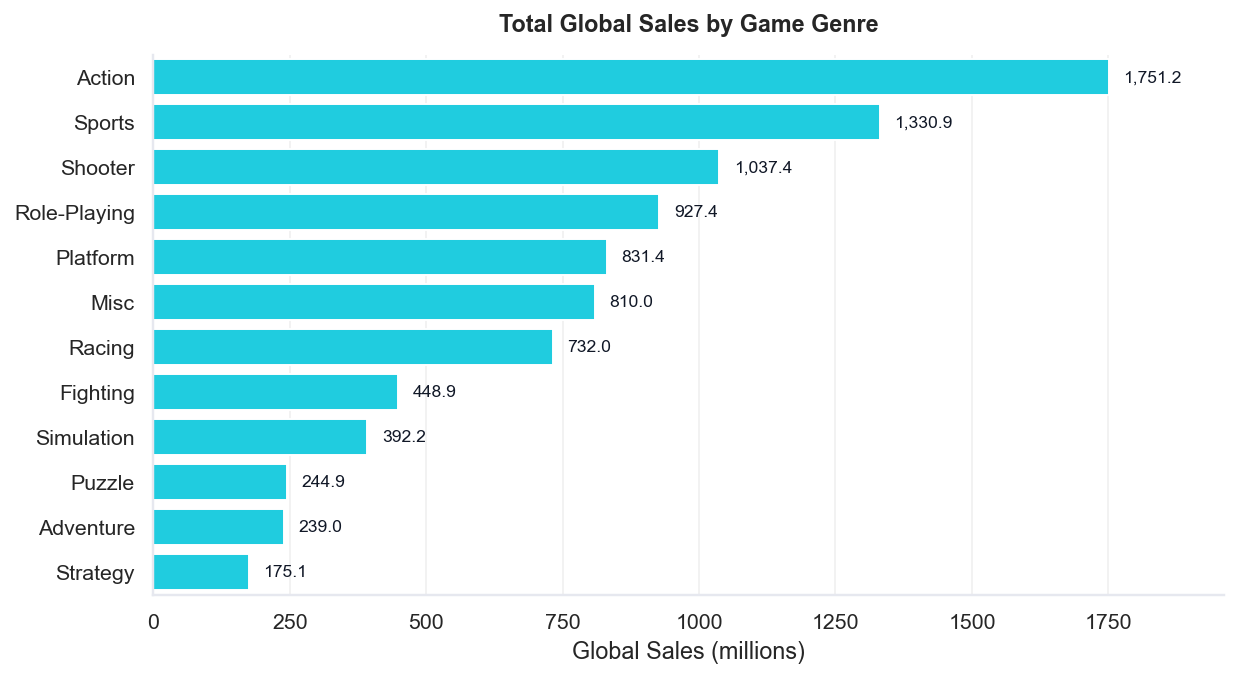

In [309]:
# 1) Sort values 
genre_sales_sorted = genre_sales.sort_values(ascending=False)

# 2) Convert to DataFrame + force Genre to string 
plot_df = (
    genre_sales_sorted
    .rename("Global_Sales")
    .reset_index()
    .rename(columns={"index": "Genre"})
)
plot_df["Genre"] = plot_df["Genre"].astype(str)

# 3) Explicit order 
order_list = plot_df["Genre"].tolist()

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(9, 5), dpi=140)

neon_cyan = "#00E5FF"

sns.barplot(
    data=plot_df,
    x="Global_Sales",
    y="Genre",
    order=order_list,         
    ax=ax,
    color=neon_cyan
)

# Value labels (outside, clean)
max_val = plot_df["Global_Sales"].max()
for i, v in enumerate(plot_df["Global_Sales"].values):
    ax.text(
        v + max_val * 0.015,
        i,
        f"{v:,.1f}",
        va="center",
        fontsize=9,
        color="#111827"
    )

ax.set_title("Total Global Sales by Game Genre", pad=12, fontweight="bold")
ax.set_xlabel("Global Sales (millions)")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

# Give room for labels
ax.set_xlim(0, max_val * 1.12)

plt.tight_layout()
plt.show()

#### ✔️ **Insight**
- Action is the highest-grossing genre globally
- Its dominance reflects both high production volume and strong worldwide demand
- Confirms Action as the most commercially influential genre in the dataset

## 8. 🎮 Which platform has the highest global sales revenue?

Analysis of **total global video game sales aggregated by platform** to identify the most commercially successful gaming platform.


**Global Sales by Platform**

In [321]:
platform_sales = (
    df_copy
    .groupby("Platform", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

platform_sales

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

**Top Platform by Global Sales**

In [323]:
platform_sales.idxmax(), platform_sales.max()

('PS2', 1255.64)

**Visualization: Total Global Sales by Platform**

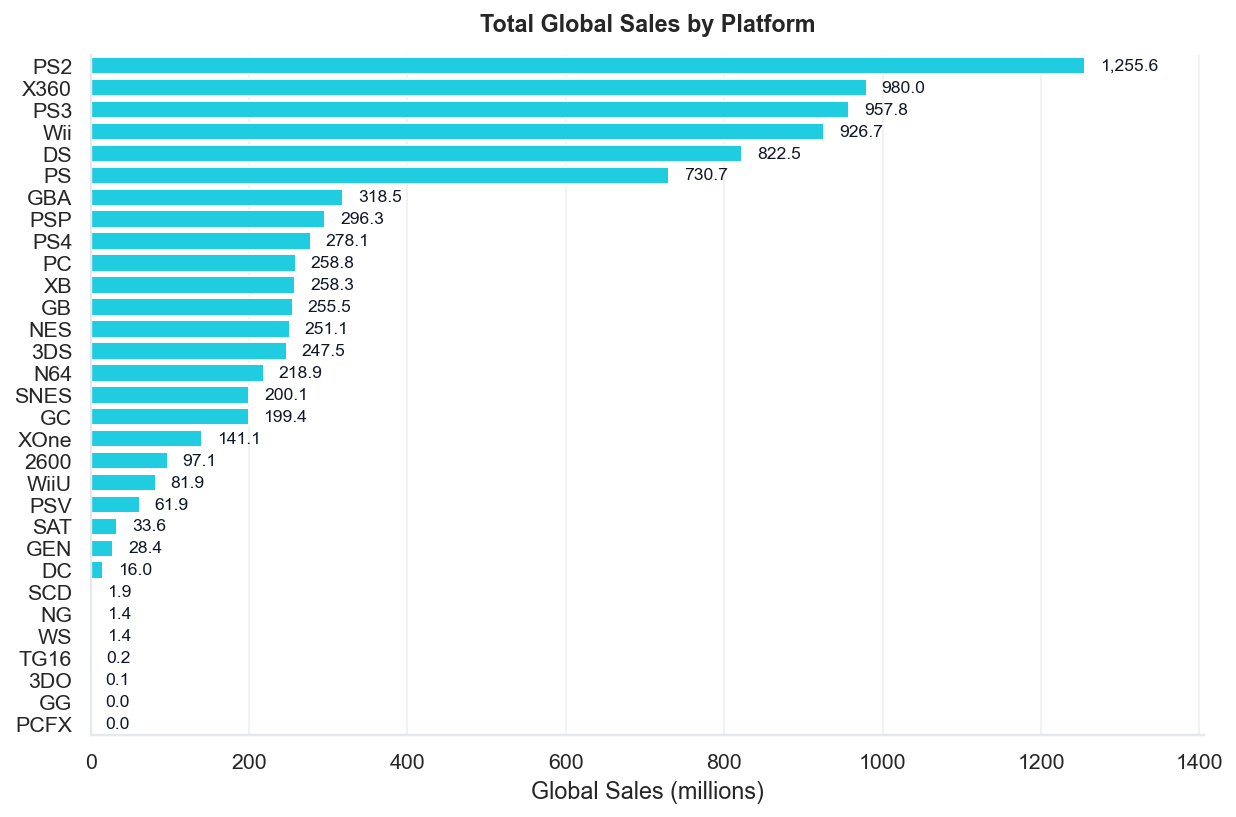

In [421]:
# Sort values 
platform_sales_sorted = platform_sales.sort_values(ascending=False)

# Convert to DataFrame 
plot_df = (
    platform_sales_sorted
    .rename("Global_Sales")
    .reset_index()
    .rename(columns={"index": "Platform"})
)

plot_df["Platform"] = plot_df["Platform"].astype(str)

# Explicit order 
order_list = plot_df["Platform"].tolist()

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(9, 6), dpi=140)

neon_cyan = "#00E5FF"

sns.barplot(
    data=plot_df,
    x="Global_Sales",
    y="Platform",
    order=order_list,     
    ax=ax,
    color=neon_cyan
)

# Value labels (outside bars)
max_val = plot_df["Global_Sales"].max()
for i, v in enumerate(plot_df["Global_Sales"].values):
    ax.text(
        v + max_val * 0.015,
        i,
        f"{v:,.1f}",
        va="center",
        fontsize=9,
        color="#111827"
    )

# Titles and labels
ax.set_title("Total Global Sales by Platform", pad=12, fontweight="bold")
ax.set_xlabel("Global Sales (millions)")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

# Space for labels
ax.set_xlim(0, max_val * 1.12)

plt.tight_layout()
plt.show()

#### ✔️ **Insight**
- PlayStation 2 (PS2) generated the highest global sales revenue
- Its dominance reflects a long market lifecycle and a large, diverse game library
- Confirms PS2 as the most commercially successful platform in the dataset

## 9. 🏆 Which individual game is the best-seller globally?

Identification of the single video game with the highest recorded global sales.


**Best-Selling Game (Global Sales)**

In [87]:
best_seller = df_copy.loc[df_copy["Global_Sales"].idxmax(), 
                          ["Name", "Platform", "Year", "Global_Sales"]]

best_seller

Name            Wii Sports
Platform               Wii
Year                  2006
Global_Sales         82.74
Name: 0, dtype: object

**Verification**

In [88]:
df_copy.sort_values("Global_Sales", ascending=False).head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


#### ✔️ **Insight**
- Wii Sports is the best-selling video game globally
- Released in 2006 for the Nintendo Wii platform
- Achieved 82.74 million units in global sales
- Its success is largely attributed to bundling with the Wii console and mass-market appeal

## 10. 📊 Sales comparison by genre

Comparison of total global sales across game genres to understand revenue distribution and market dominance.

**Total Global Sales by Genre**

In [91]:
genre_sales = (
    df_copy
    .groupby("Genre", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

genre_sales

Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
Name: Global_Sales, dtype: float64

**Visualization: Global Sales by Genre**

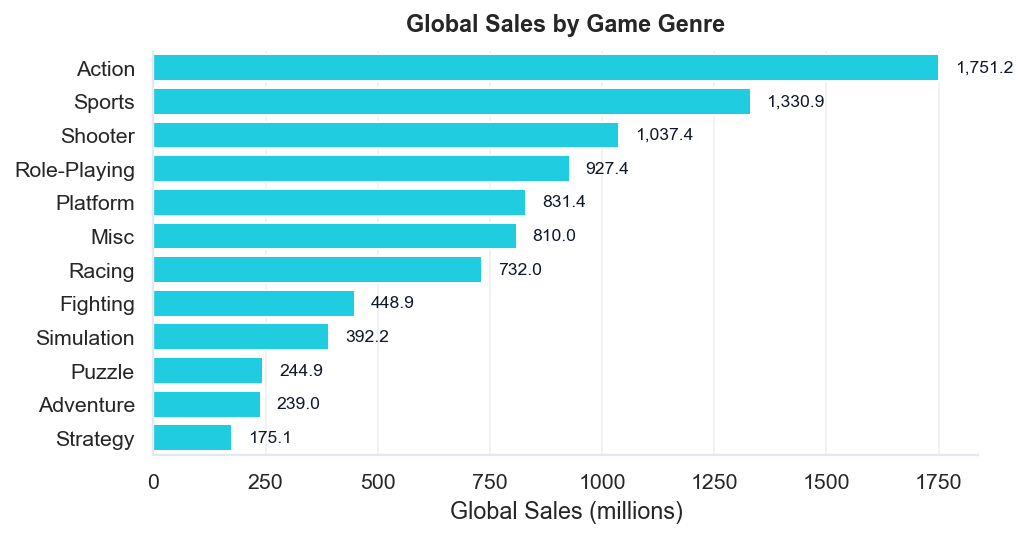

In [419]:
# Sort by total sales (largest first)
genre_sales_sorted = genre_sales.sort_values(ascending=False)

# Convert to DataFrame and fix dtype
plot_df = (
    genre_sales_sorted
    .rename("Global_Sales")
    .reset_index()
    .rename(columns={"index": "Genre"})
)

plot_df["Genre"] = plot_df["Genre"].astype(str)

# Explicit order for seaborn
order_list = plot_df["Genre"].tolist()

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(7.5, 4), dpi=140)

bar_color = "#00E5FF"

sns.barplot(
    data=plot_df,
    x="Global_Sales",
    y="Genre",
    order=order_list,
    ax=ax,
    color=bar_color
)

# Value labels (outside bars)
max_val = plot_df["Global_Sales"].max()
for i, v in enumerate(plot_df["Global_Sales"]):
    ax.text(
        v + max_val * 0.02,   
        i,
        f"{v:,.1f}",
        va="center",
        ha="left",
        fontsize=9,
        color="#111827"
    )

# Titles and labels
ax.set_title("Global Sales by Game Genre", pad=10, fontweight="bold")
ax.set_xlabel("Global Sales (millions)")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

plt.tight_layout()
plt.show()

**Percentage Contribution by Genre**

In [93]:
genre_sales_percentage = (genre_sales / genre_sales.sum()) * 100
genre_sales_percentage

Genre
Action          19.532990
Sports          14.843385
Shooter         11.634446
Role-Playing    10.473949
Platform         9.400410
Misc             9.042942
Racing           8.239686
Fighting         5.034375
Simulation       4.423402
Puzzle           2.746146
Adventure        2.662023
Strategy         1.966246
Name: Global_Sales, dtype: float64

#### ✔️ **Insight**
- Action generates the highest share of global sales (~19.5%)
- Sports and Shooter follow as the next most profitable genres
- Revenue distribution is concentrated in a few top genres, indicating a strong market focus on high-demand categories

## 11. 💿 Sales comparison by platform

Comparison of total global sales across gaming platforms to identify revenue concentration and market leaders.


**Total Global Sales by Platform**

In [96]:
platform_sales = (
    df_copy
    .groupby("Platform", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

platform_sales

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.96
PS       727.39
GBA      313.56
PSP      291.71
PS4      278.10
PC       255.05
GB       254.42
XB       252.09
NES      251.07
3DS      246.28
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.63
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

**Visualization: Global Sales by Platform**

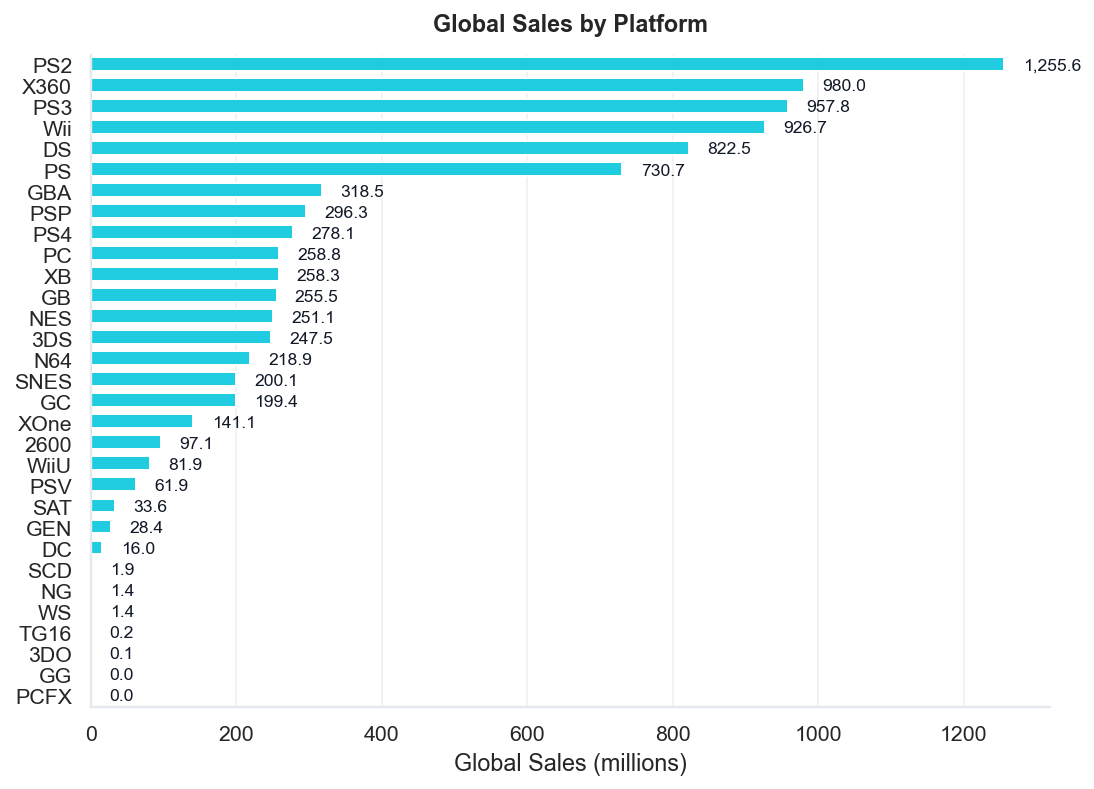

In [417]:
# Sort by total sales 
platform_sales_sorted = platform_sales.sort_values(ascending=False)

# Convert to DataFrame and fix dtype (for seaborn)
plot_df = (
    platform_sales_sorted
    .rename("Global_Sales")
    .reset_index()
    .rename(columns={"index": "Platform"})
)

plot_df["Platform"] = plot_df["Platform"].astype(str)

# Explicit order for seaborn
order_list = plot_df["Platform"].tolist()

sns.set_theme(style="white")


fig, ax = plt.subplots(figsize=(8, 5.8), dpi=140)

bar_color = "#00E5FF"  # gaming accent (neon cyan)

sns.barplot(
    data=plot_df,
    x="Global_Sales",
    y="Platform",
    order=order_list,
    ax=ax,
    color=bar_color,
    height=0.65          
)

# Value labels (outside bars)
max_val = plot_df["Global_Sales"].max()
for i, v in enumerate(plot_df["Global_Sales"]):
    ax.text(
        v + max_val * 0.02,
        i,
        f"{v:,.1f}",
        va="center",
        ha="left",
        fontsize=9,
        color="#111827"
    )

# Titles and labels
ax.set_title("Global Sales by Platform", pad=12, fontweight="bold")
ax.set_xlabel("Global Sales (millions)")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

plt.tight_layout()
plt.show()

**Percentage Contribution by Platform**

In [98]:
platform_sales_percentage = (platform_sales / platform_sales.sum()) * 100
platform_sales_percentage

Platform
PS2     13.984236
X360    10.992862
PS3     10.763166
Wii     10.314885
DS       9.284882
PS       8.246716
GBA      3.554957
PSP      3.307235
PS4      3.152933
PC       2.891605
GB       2.884463
XB       2.858047
NES      2.846482
3DS      2.792176
N64      2.473935
SNES     2.268048
GC       2.235056
XOne     1.599254
2600     0.981479
WiiU     0.928080
PSV      0.698724
SAT      0.380823
GEN      0.321529
DC       0.181058
SCD      0.021201
NG       0.016326
WS       0.016099
TG16     0.001814
3DO      0.001134
GG       0.000453
PCFX     0.000340
Name: Global_Sales, dtype: float64

#### ✔️ **Insight**
- PS2 leads global sales with ~14% market share
- Xbox 360, PS3, and Wii follow closely, indicating strong competition
- Sales are concentrated among a few dominant platforms, with a long tail of niche systems

## 12. 🏢 Top 20 publishers with the most game releases

Analysis of publisher activity based on the **number of games released**, highlighting the most prolific companies in the dataset.


**Top 20 Publishers by Number of Releases**

In [101]:
top_publishers = (
    df_copy["Publisher"]
    .value_counts()
    .head(20)
)

top_publishers

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Name: count, dtype: int64

#### ✔️ **Insight**
- Electronic Arts leads in total number of released games
- Activision, Namco Bandai Games, and Ubisoft closely follow
- The distribution shows a strong concentration among major publishers
- A long tail of smaller publishers contributes fewer titles overall
- This reflects industry consolidation, where a limited number of large publishers dominate game production.

## 13. 🌐 Highest global sales by publisher

Analysis of **total global video game sales aggregated by publisher** to identify the most commercially successful companies.


**Global Sales by Publisher**

In [104]:
publisher_sales = (
    df_copy
    .groupby("Publisher", observed=True)["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
)

publisher_sales.head(10)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

**Top Publisher by Global Sales**

In [105]:
publisher_sales.idxmax(), publisher_sales.max()

('Nintendo', 1784.43)

#### ✔️ **Insight**
- Nintendo is the publisher with the highest global sales revenue
- Its dominance is driven by iconic franchises and strong platform integration
- Publishers with strong first-party titles consistently outperform third-party competitors
- Highlights the strategic advantage of controlling both hardware and software ecosystems

## 14. 📅 Publishers with the most game releases by year

Identification of the **most active publisher in each year** based on the number of game releases.


**Game Releases by Year and Publisher**

In [108]:
publisher_year_counts = (
    df_copy
    .groupby(["Year", "Publisher"], observed=True)
    .size()
    .reset_index(name="Game_Count")
)

**Top Publisher per Year**

In [109]:
top_publisher_per_year = (
    publisher_year_counts
    .loc[publisher_year_counts.groupby("Year")["Game_Count"].idxmax()]
    .sort_values("Year")
)

top_publisher_per_year.head()

,Year,Publisher,Game_Count
0,1980,Activision,5
4,1981,Atari,11
19,1982,Atari,14
35,1983,Atari,6
41,1984,Nintendo,9


#### ✔️ **Insight**
- Early years are dominated by legacy publishers such as Atari and Activision
- Over time, leadership shifts toward larger modern publishers
- The results highlight changing industry dynamics and consolidation trends
- Publisher dominance varies significantly across different periods

## 15. 🌎 Total revenue analysis by region

Analysis of total global video game sales across different geographic regions to understand regional market contributions.


**Total Sales by Region**

In [398]:
regional_sales = df_copy[[
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales"
]].sum()

regional_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [400]:
regional_sales_df = regional_sales.reset_index()
regional_sales_df.columns = ["Region", "Total_Sales"]

**Percentage Contribution by Region**

In [402]:
regional_sales_percentage = (regional_sales / regional_sales.sum()) * 100
regional_sales_percentage

NA_Sales       49.271242
EU_Sales       27.301155
JP_Sales       14.480055
Other_Sales     8.947548
dtype: float64

**Visualization: Total Global Revenue by Region**

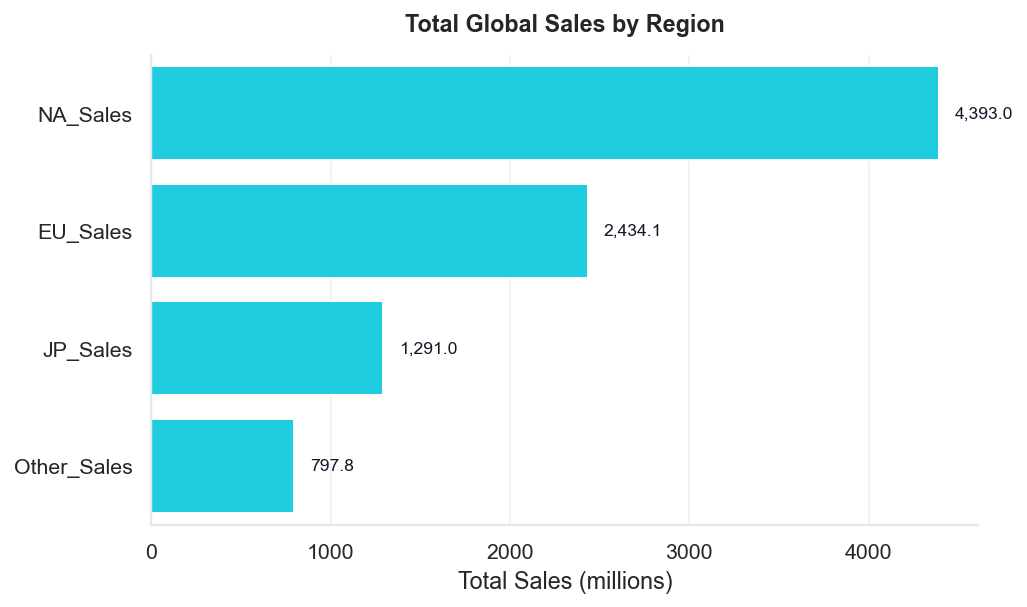

In [412]:
# Sort regions by total sales 
regional_sales_sorted = regional_sales_df.sort_values(
    by="Total_Sales",
    ascending=False
)

# Fix dtype 
plot_df = regional_sales_sorted.copy()
plot_df["Region"] = plot_df["Region"].astype(str)

# Explicit order for seaborn
order_list = plot_df["Region"].tolist()

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(7.5, 4.5), dpi=140)

bar_color = "#00E5FF"  # gaming accent (neon cyan)

sns.barplot(
    data=plot_df,
    x="Total_Sales",
    y="Region",
    order=order_list,
    ax=ax,
    color=bar_color
)

# Value labels (outside bars)
max_val = plot_df["Total_Sales"].max()
for i, v in enumerate(plot_df["Total_Sales"]):
    ax.text(
        v + max_val * 0.02,   
        i,
        f"{v:,.1f}",
        va="center",
        ha="left",
        fontsize=9,
        color="#111827"
    )

# Titles and labels
ax.set_title("Total Global Sales by Region", pad=12, fontweight="bold")
ax.set_xlabel("Total Sales (millions)")
ax.set_ylabel("")

# Clean grid and spines
ax.grid(axis="y", visible=False)
ax.grid(axis="x", alpha=0.25)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#E6E8EF")
ax.spines["bottom"].set_color("#E6E8EF")

plt.tight_layout()
plt.show()

#### ✔️ **Insight**
- North America accounts for the largest share of global video game revenue (~49%)
- Europe is the second-largest market, followed by Japan
- Other regions contribute a smaller but meaningful portion of total sales
- Highlights strong regional differences in market size and consumer demand

## ✅ Summary
- Highlight key findings obtained from each section.
- Summarize observed patterns and relationships.
- Provide recommendations for next steps (e.g., predictive models, trend analysis, etc.).

### Key Findings
- The dataset is well-structured, with **limited missing values** and no critical data quality issues after cleaning  
- **Action** is the most frequently produced genre and also the top-performing genre in terms of global sales  
- The **late 2000s (2007–2009)** represent the peak period for both game releases and total global sales, with **2008** as the highest release year  
- **PlayStation 2 (PS2)** is the most successful platform by total global sales, highlighting the impact of platform longevity and large game libraries  
- At the publisher level, **Nintendo** achieved the highest global sales revenue, driven by strong first-party franchises  
- **North America** dominates global sales, followed by **Europe** and **Japan**, reflecting regional differences in market size and demand  


### Observed Patterns & Relationships
- Higher production volume generally coincides with stronger global sales, indicating market expansion during peak years  
- Genres with large catalogs—especially Action—tend to generate higher total sales, though results are strongly influenced by blockbuster titles  
- Market dominance is concentrated among a small number of platforms and publishers, pointing to **industry consolidation** and the importance of brand ecosystems  


### Recommendations & Next Steps
- Perform **time-series trend analysis** to study how genre popularity and regional sales evolve over time  
- Build **predictive models** to estimate future sales using features such as genre, platform, publisher, and release year  
- Introduce **efficiency metrics** (e.g., average sales per game by genre or publisher) to evaluate profitability beyond volume  
- Apply **clustering or segmentation** techniques to group games or publishers with similar sales profiles for deeper market insights